In [7]:
import pandas as pd

In [8]:
# Load the dataset
df = pd.read_csv('Downloads/CAR DETAILS.csv')

In [9]:
# Display the first few rows of the dataset
print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [10]:
# Get the data types of each column
print(df.dtypes)

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


In [11]:
# Summary statistics for numerical columns
print(df.describe())

              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


In [12]:
# Check for missing values
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [13]:
 # Summary statistics for categorical columns
print(df.describe(include=['object', 'category']))

                          name    fuel seller_type transmission        owner
count                     4340    4340        4340         4340         4340
unique                    1491       5           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        69    2153        3244         3892         2832


In [14]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [15]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['selling_price', 'km_driven']] = scaler.fit_transform(df[['selling_price', 'km_driven']])

In [14]:
from sklearn.impute import SimpleImputer
# Impute missing values in specific columns with the mean
imputer = SimpleImputer(strategy='mean')
df['km_driven'] = imputer.fit_transform(df[['km_driven']])

In [15]:
# Scale numerical columns
scaler = StandardScaler()
numerical_columns = ['selling_price', 'km_driven', 'year']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting settings
sns.set(style='whitegrid')

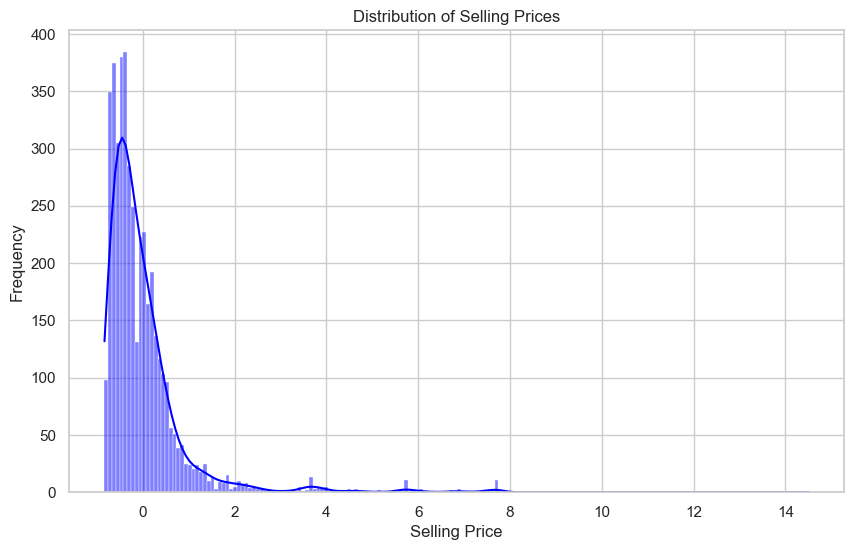

In [21]:
# 1. Distribution of Selling Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, color='blue')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

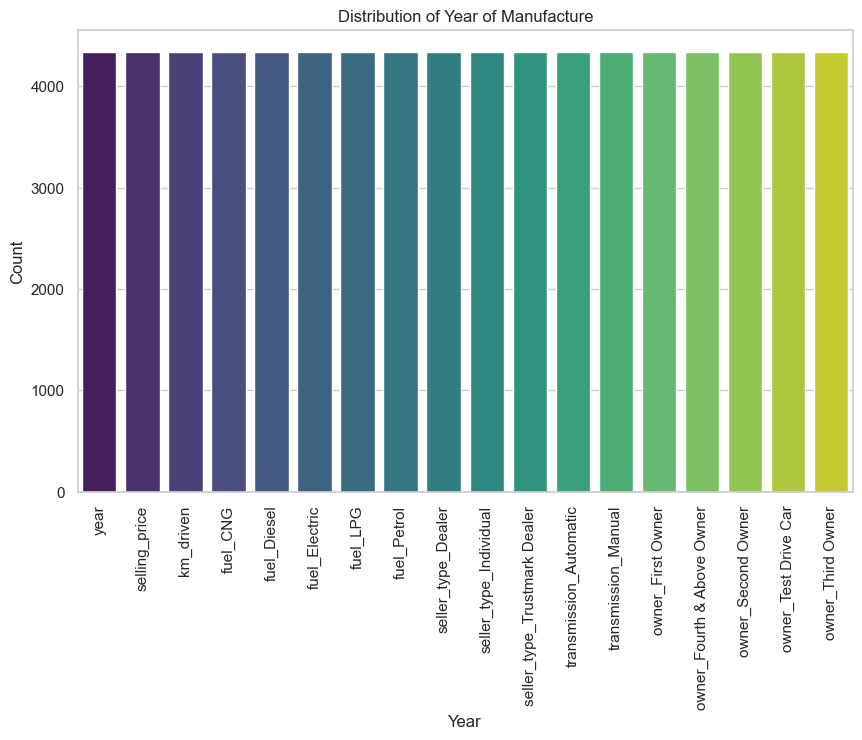

In [22]:
# 2. Distribution of Year of Manufacture
plt.figure(figsize=(10, 6))
sns.countplot(data=df, palette='viridis')
plt.title('Distribution of Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

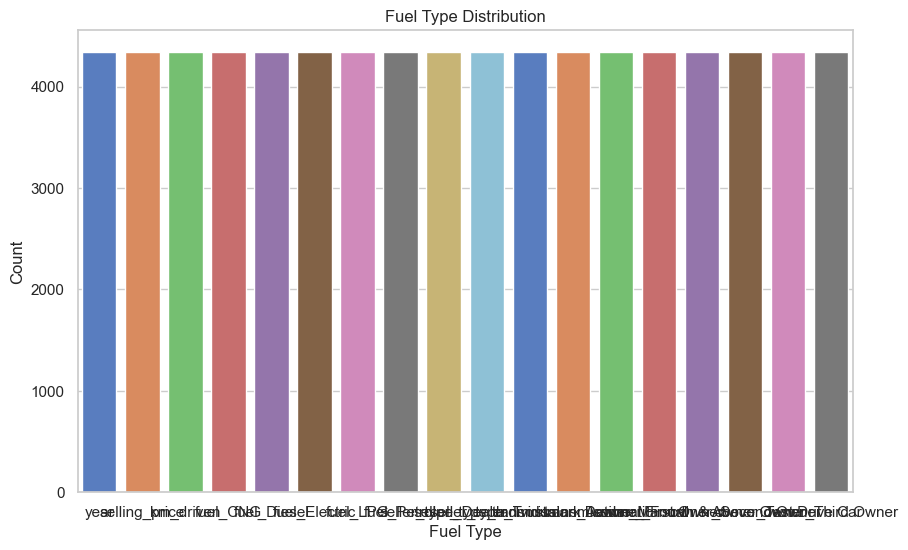

In [23]:
 # 3. Fuel Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, palette='muted')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show

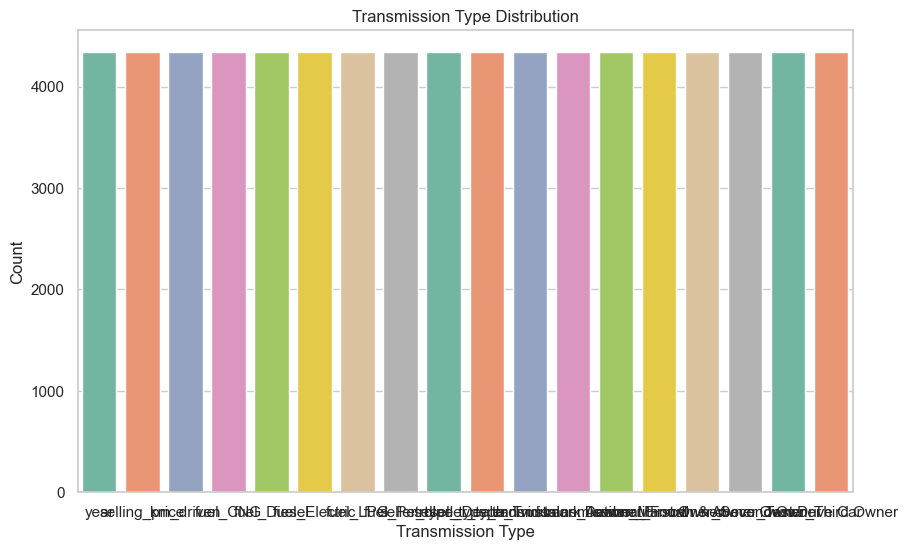

In [24]:
# 4. Transmission Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, palette='Set2')
plt.title('Transmission Type Distribution')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

C:\Users\Prashanthi Sirpurapu\AppData\Local\Temp\ipykernel_10560\1890586954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='year', y='selling_price', palette='coolwarm')


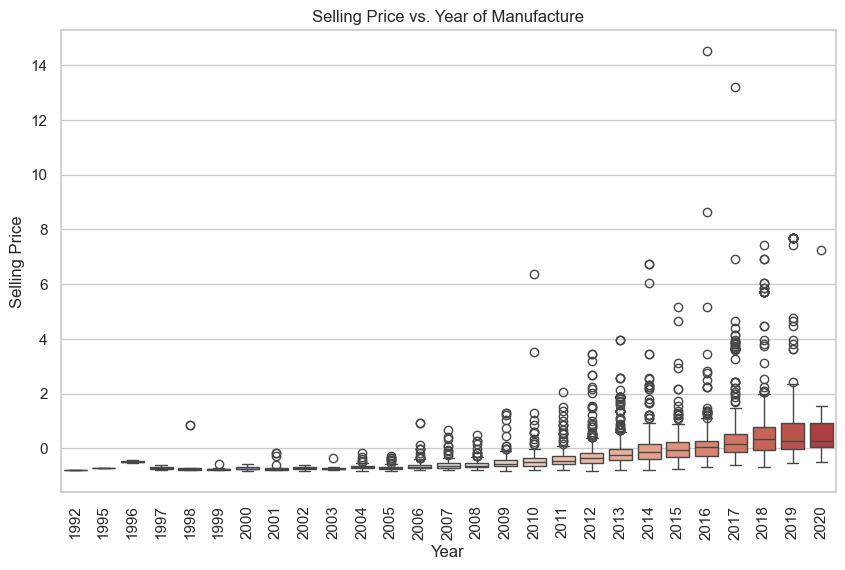

In [27]:
# 5. Selling Price vs. Year
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='year', y='selling_price', palette='coolwarm')
plt.title('Selling Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()
